# Seasonality in Mn from a variety of datasets

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime
import calendar

%matplotlib inline

In [107]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
def normalize(value):
    norm_value = [(i-np.nanmin(value))/(np.nanmax(value)-np.nanmin(value)) for i in value]
    return norm_value

### St. Lawrence River, 1990:

Data source: Cossa, D., G. H. Tremblay, and C. Gobeil. "Seasonality in iron and manganese concentrations of the St. Lawrence River." Science of the Total Environment 97 (1990): 185-190. 

https://www.sciencedirect.com/science/article/pii/004896979090239Q

Data collected between Autumn 1982 and Spring 1985.

In [3]:
# Load data:
def read_csv(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    data = csv.reader(ifile)
    
    year = []
    month = []
    value = []
   
    i = 0
    for row in data:
        i += 1
        if i < 2:
            i == 1
        else:
            year.append(str(row[0]))
            month.append(str(row[1]))
            value.append(float(row[2]))
    return year, month, value

f1 = '/ocean/brogalla/GEOTRACES/data/rivers/discharge_quebec.csv'
f2 = '/ocean/brogalla/GEOTRACES/data/rivers/dissolv_mn_quebec.csv'
f3 = '/ocean/brogalla/GEOTRACES/data/rivers/part_mn_quebec.csv'

y1, m1, discharge = read_csv(f1)
y2, m2, mn_dis = read_csv(f2) 
y3, m3, mn_part = read_csv(f3)

In [4]:
def add_days(y,m):
    date_name = []
    d = 1
    for i in range(0,len(m)):
        if i > 0:
            if m[i] == m[i-1]:
                d = d + 7
            else:
                d = 1
        date_name.append(y[i]+'-'+m[i]+'-'+str(d))
    
    return date_name

In [5]:
date_name1 = add_days(y1,m1)
date_name2 = add_days(y2,m2)
date_name3 = add_days(y3,m3)

In [6]:
# Create datetime object:
# Convert date
def convert_date(date):
    date_obj = []
    j = 0
    for i in date:
        j+=1
        conv = datetime.datetime.strptime(i, '%Y-%m-%d')
        date_obj.append(conv)
        
    return date_obj

In [7]:
date_obj1 = convert_date(date_name1)
date_obj2 = convert_date(date_name2)
date_obj3 = convert_date(date_name3)

SPM data from: 
Pocklington, Roger, and Francis C. Tan. "Seasonal and annual variations in the organic matter contributed by the St Lawrence River to the Gulf of St. Lawrence." Geochimica et Cosmochimica Acta 51.9 (1987): 2579-2586.

https://ac.els-cdn.com/0016703787903085/1-s2.0-0016703787903085-main.pdf?_tid=1db696d5-2875-4835-a3e1-00147d1b50ad&acdnat=1520534534_47e5c8602c9ba6abfd9ecc55da87ab59

In [8]:
dates_SPM = ['1982-1','1982-2','1982-3','1982-5', '1982-6', '1982-7', \
         '1982-8', '1982-9', '1982-10', '1982-11', '1982-12', \
         '1983-1','1983-2','1983-3','1983-4','1983-5', '1983-6', '1983-7', \
         '1983-8', '1983-9', '1983-10', '1983-11', \
         '1984-1','1984-2','1984-3','1984-4','1984-5', '1984-6', '1984-7', \
         '1984-8', '1984-9', '1984-10', '1984-11', '1984-12']
SPM = [7.11, 6.76, 4.91, 6.05, 4.51, 4.98, 5.73, 7.28, 8.85, 10.79, 9.80, \
       6.00, 9.75, 11.90, 23.85, 18.21, 17.02, 5.65, 11.48, 9.41, 8.94, 31.50, \
       7.31, 8.98, 12.16, 21.92, 12.57, 19.99, 6.68, 9.59, 5.00, 11.88, 21.84, 8.43]

In [9]:
# Create datetime object:
# Convert date
def convert_datespm(date):
    date_obj = []
    j = 0
    for i in date:
        j+=1
        conv = datetime.datetime.strptime(i, '%Y-%m')
        date_obj.append(conv)
        
    return date_obj

In [10]:
date_spm = convert_datespm(dates_SPM)

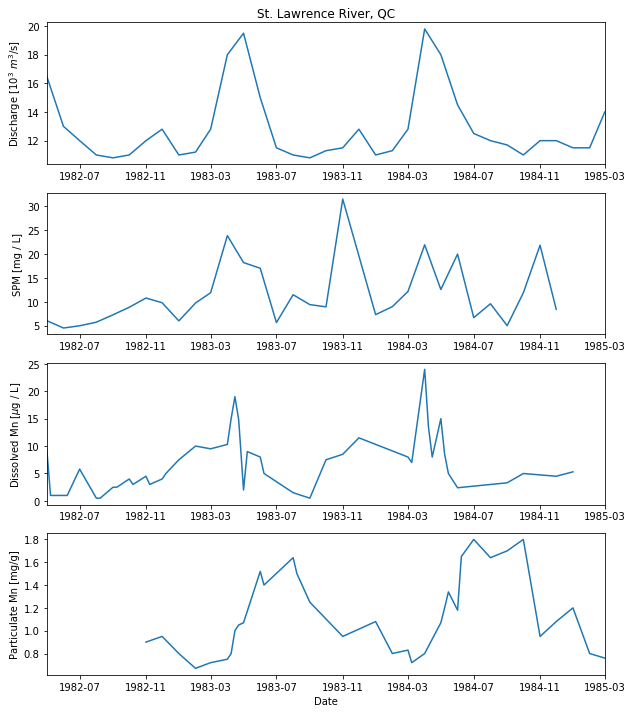

In [11]:
# Plot data:
fig = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((4, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((4, 1), (1, 0)) # SPM
ax3 = plt.subplot2grid((4, 1), (2, 0)) # dissolved mn
ax4 = plt.subplot2grid((4, 1), (3, 0)) # particulate mn

ax1.plot(date_obj1,discharge)
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('St. Lawrence River, QC')
ax1.set_xlim(date_obj2[0], date_obj3[-1])

ax2.plot(date_spm,SPM)
ax2.set_ylabel(r'SPM [mg / L]')
ax2.set_xlim(date_obj2[0], date_obj3[-1])

ax3.plot(date_obj2,mn_dis)
ax3.set_ylabel(r'Dissolved Mn [$\mu$g / L]')
ax3.set_xlim(date_obj2[0], date_obj3[-1])

ax4.plot(date_obj3,mn_part)
ax4.set_xlabel('Date')
ax4.set_ylabel('Particulate Mn [mg/g]')
ax4.set_xlim(date_obj2[0], date_obj3[-1])
fig.savefig('stlawrence_1982-85.png', bbox_inches='tight')

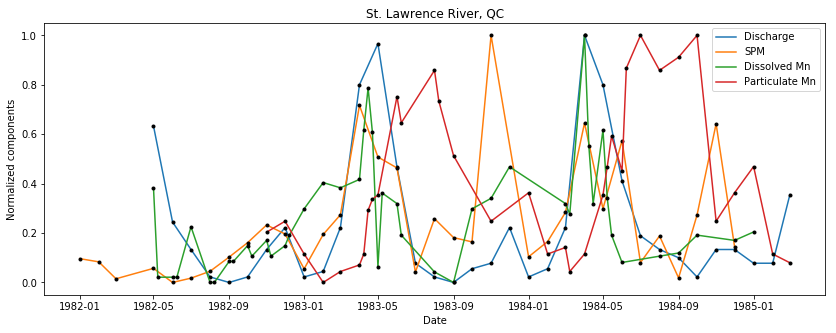

In [12]:
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1, 1), (0, 0)) # discharge

ax1.plot(date_obj1,normalize(discharge), label='Discharge')
ax1.plot(date_obj1,normalize(discharge), '.k')
ax1.plot(date_spm,normalize(SPM), label='SPM')
ax1.plot(date_spm,normalize(SPM), '.k')
ax1.plot(date_obj2,normalize(mn_dis), label='Dissolved Mn')
ax1.plot(date_obj2,normalize(mn_dis), '.k')
ax1.plot(date_obj3,normalize(mn_part), label='Particulate Mn')
ax1.plot(date_obj3,normalize(mn_part), '.k')

ax1.set_ylabel('Normalized components')
ax1.set_xlabel('Date')
ax1.set_title('St. Lawrence River, QC')
ax1.legend()

# Ottowa River:

Ottawa & Upper Saint Lawrence river:
https://ac.els-cdn.com/S0883292705000752/1-s2.0-S0883292705000752-main.pdf?_tid=63aba33a-0538-11e8-8546-00000aab0f01&acdnat=1517260218_698206dea08cb16d823a73f709bda3bd

Rondeau, Bernard, et al. "Hydrological and biogeochemical dynamics of the minor and trace elements in the St. Lawrence River." Applied Geochemistry 20.7 (2005): 1391-1408.

In [11]:
ow_dates = ['1995-3', '1995-5', '1995-6','1995-8','1995-9','1995-10','1995-12', '1996-2', \
            '1996-3', '1996-4', '1996-5','1996-6', '1996-9']
ow_discharge = [3, 2.2, 3.4, 0.9, 0.8, 1.1, 2, 2.3, 1.9, 2, 5.8, 1.8, 1.2]
ow_mn_dis = [200, 140, 150, 20, 50, 35, 160, 140, 160, 150, 270, 80, 35]
ow_mn_part = [50, 100, 260, 180, 200, 70, 140, 75, 50, 60, 100, 150, 200]
ow_SPM = [2.2, 0.8, 3.5, 0.2, 0.1, 0.1, 1.1, 1.6, 0.9, 1, 10.7, 1.7, 0.3] #103 tons/d

In [12]:
def convert_date(date):
    date_obj = []
    for i in date:
        conv = datetime.datetime.strptime(i, '%Y-%m')
        date_obj.append(conv)
    return date_obj

ow_dates = convert_date(ow_dates)

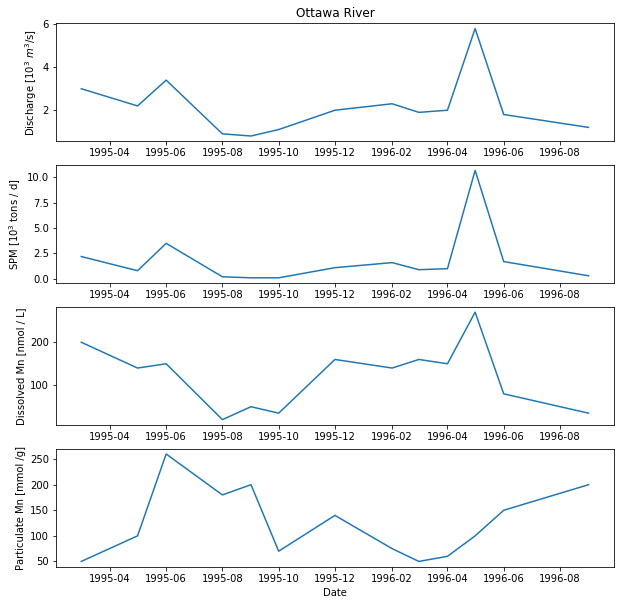

In [13]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((4, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((4, 1), (1, 0)) # dissolved mn
ax3 = plt.subplot2grid((4, 1), (2, 0)) # particulate mn
ax4 = plt.subplot2grid((4, 1), (3, 0))

ax1.plot(ow_dates,ow_discharge)
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('Ottawa River')

ax2.plot(ow_dates,ow_SPM)
ax2.set_ylabel(r'SPM [$10^3$ tons / d]')

ax3.plot(ow_dates,ow_mn_dis)
ax3.set_ylabel('Dissolved Mn [nmol / L]')

ax4.plot(ow_dates,ow_mn_part)
ax4.set_xlabel('Date')
ax4.set_ylabel('Particulate Mn [mmol /g]')
fig.savefig('ottawa_1995-96.png', bbox_inches='tight')

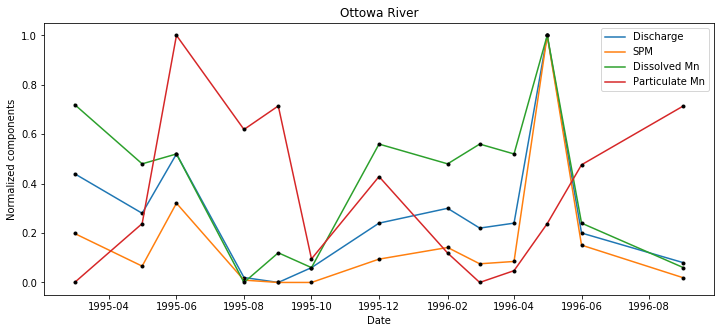

In [15]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot2grid((1, 1), (0, 0)) # discharge

ax1.plot(ow_dates,normalize(ow_discharge), label='Discharge')
ax1.plot(ow_dates,normalize(ow_discharge), '.k')
ax1.plot(ow_dates,normalize(ow_SPM), label='SPM')
ax1.plot(ow_dates,normalize(ow_SPM), '.k')
ax1.plot(ow_dates,normalize(ow_mn_dis), label='Dissolved Mn')
ax1.plot(ow_dates,normalize(ow_mn_dis), '.k')
ax1.plot(ow_dates,normalize(ow_mn_part), label='Particulate Mn')
ax1.plot(ow_dates,normalize(ow_mn_part), '.k')

ax1.set_ylabel('Normalized components')
ax1.set_xlabel('Date')
ax1.set_title('Ottowa River')
ax1.legend()
fig.savefig('ottawa_combined.png', bbox_inches='tight')

# Kalix River, Sweden:

Pontér, Christer, et al. "Temporal variations in dissolved and suspended iron and manganese in the Kalix River, northern Sweden." Chemical Geology 81.1-2 (1990): 121-131.

https://ac.els-cdn.com/0009254190900426/1-s2.0-0009254190900426-main.pdf?_tid=060afb1d-b9df-4c55-b707-a9075eb016b1&acdnat=1520535880_44d6d1305492963eea2c887aee166c85

Use Fe as a proxy for SPM. 

In [14]:
def convert_date_full(date):
    date_obj = []
    for i in date:
        conv = datetime.datetime.strptime(i, '%Y-%m-%d')
        date_obj.append(conv)
    return date_obj

In [15]:
Q_dates = ['1982-5-3','1982-5-10','1982-5-17', '1982-5-20', '1982-5-24', '1982-5-30', \
          '1982-6-2', '1982-6-8', '1982-6-10', '1982-6-14', '1982-6-20', '1982-6-22', \
          '1982-6-28', '1982-6-30', '1982-7-5', '1982-7-10', '1982-7-12', '1982-7-20', \
          '1982-7-22', '1982-7-29', '1982-7-30', '1982-8-5', '1982-8-10', '1982-8-12', \
          '1982-8-19', '1982-8-20', '1982-8-30', '1982-8-31', '1982-9-10', '1982-9-20', \
          '1982-9-27', '1982-9-30']
Q = [200, 450, 1300, 1250, 730, 800, 810, 1100, 975, 900, 350, 280, 275, 280, \
    315, 500, 700, 450, 420, 400, 380, 300, 280, 275, 330, 335, 385, 380, 440, \
    360, 475, 420] #m3/s
K_dates = ['1982-5-3', '1982-5-10', '1982-5-17', '1982-5-24', '1982-6-2', '1982-6-8', \
        '1982-6-14', '1982-6-22', '1982-6-28', '1982-7-5', '1982-7-12', '1982-7-22', \
        '1982-7-29', '1982-8-5', '1982-8-12', '1982-8-19', '1982-8-31', '1982-9-27']
K_pMn = [7, 16, 13, 9, 14, 3, 4, 5.5, 3.8, 12, 15, 18.5, 14, 19, 13, 11, 10, 8] # microg/L
K_dMn = [53, 26, 16, 14, 12, 11, 10.5, 12.6, 13, 4.3, 2.8, 1.8, 4, 3.8, 4, 2, 4, 6]
K_pFe = [230, 360, 135, 155, 160, 35, 45, 50, 45, 45, 30, 32, 32, 20, 30, 29, 45, 80]

In [16]:
Q_date = convert_date_full(Q_dates)
K_date = convert_date_full(K_dates)

Text(0,0.5,'Particulate Mn [microg / L]')

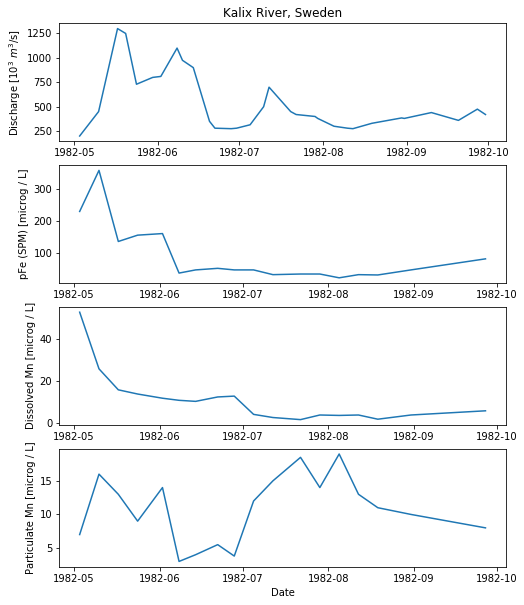

In [15]:
fig = plt.figure(figsize=(8,10))
ax1 = plt.subplot2grid((4, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((4, 1), (1, 0)) # dissolved mn
ax3 = plt.subplot2grid((4, 1), (2, 0)) # particulate mn
ax4 = plt.subplot2grid((4, 1), (3, 0)) # particulate mn

ax1.plot(Q_date,Q)
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('Kalix River, Sweden')

ax2.plot(K_date, K_pFe)
ax2.set_ylabel('pFe (SPM) [microg / L]')

ax3.plot(K_date, K_dMn)
ax3.set_ylabel('Dissolved Mn [microg / L]')

ax4.plot(K_date, K_pMn)
ax4.set_xlabel('Date')
ax4.set_ylabel('Particulate Mn [microg / L]')

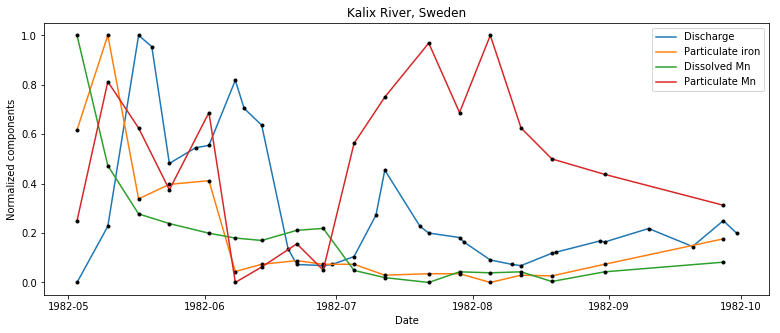

In [18]:
fig = plt.figure(figsize=(13,5))
ax1 = plt.subplot2grid((1, 1), (0, 0)) # discharge

ax1.plot(Q_date,normalize(Q), label='Discharge')
ax1.plot(Q_date,normalize(Q), '.k')
ax1.plot(K_date,normalize(K_pFe), label='Particulate iron')
ax1.plot(K_date,normalize(K_pFe), '.k')
ax1.plot(K_date,normalize(K_dMn), label='Dissolved Mn')
ax1.plot(K_date,normalize(K_dMn), '.k')
ax1.plot(K_date,normalize(K_pMn), label='Particulate Mn')
ax1.plot(K_date,normalize(K_pMn), '.k')

ax1.set_ylabel('Normalized components')
ax1.set_xlabel('Date')
ax1.set_title('Kalix River, Sweden')
ax1.legend()
fig.savefig('kalix_combined.png', bbox_inches='tight')

Pontér, Christer, Johan Ingri, and Kurt Boström. "Geochemistry of manganese in the Kalix River, northern Sweden." Geochimica et Cosmochimica Acta 56.4 (1992): 1485-1494.

https://www.sciencedirect.com/science/article/pii/0016703792902188?_rdoc=1&_fmt=high&_origin=gateway&_docanchor=&md5=b8429449ccfc9c30159a5f9aeaa92ffb

In [17]:
Q_dates2 = ['1985-5-1', '1985-5-15', '1985-5-25', '1985-5-30', '1985-6-5', '1985-6-15', '1985-6-25', \
          '1985-6-30', '1985-7-5', '1985-7-15', '1985-7-30', '1985-8-5', '1985-8-15', '1985-8-20', \
          '1985-8-30', '1985-9-5', '1985-9-15', '1985-9-25', '1985-9-30', '1985-10-5', '1985-10-15', \
          '1985-10-30', '1985-11-5', '1985-11-10', '1985-11-20', '1985-11-30', '1985-12-5', \
          '1985-12-15', '1985-12-30', '1986-1-5', '1986-1-15', '1986-1-30', '1986-2-15', \
          '1986-2-25', '1986-3-5', '1986-3-15', '1986-3-30', '1986-4-15', '1986-4-30', '1986-5-5', \
          '1986-5-15', '1986-5-30', '1986-6-5', '1986-6-15', '1986-6-30', '1986-7-5', '1986-7-15', \
          '1986-7-30', '1986-8-5', '1986-8-10', '1986-8-15', '1986-8-30', '1986-9-5', '1986-9-15', \
          '1986-9-30']
Q2 = [50, 370, 1000, 400, 500, 550, 700, 600, 380, 260, 300, 440, 500, 550, 630, 480, 620, \
    760, 600, 420, 435, 450, 360, 220, 310, 240, 180, 150, 125, 130, 100, 100, 90, 80, \
    75, 60, 50, 55, 60, 300, 900, 1450, 1600, 700, 430, 320, 360, 310, 280, 450, 300, \
    200, 220, 250, 200] #m3/s
TSS2 = [50, 370, 1580, 230, 150, 90, 130, 80, 80, 75, 80, 100, 120, 120, 160, 110, 120, \
    140, 150, 90, 100, 200, 420, 175, 120, 110, 110, 75, 130, 115, 120, 100, 100, 90, 80, \
    75, 60, 60, 65, 70, 320, 860, 630, 710, 150, 100, 80, 110, 100, 120, 110, \
    90, 95, 100, 105] #mg/L
Mn_dates2 = ['1985-5-1', '1985-5-5','1985-5-12', '1985-5-20', '1985-5-30', '1985-6-7', '1985-6-15', \
           '1985-6-30', '1985-7-5', '1985-7-15', '1985-7-25', '1985-7-30', '1985-8-5', '1985-8-15', \
           '1985-8-30', '1985-9-5', '1985-9-15', '1985-9-30', '1985-10-5', '1985-10-23', '1985-10-30', \
           '1985-11-5', '1985-11-15', '1985-11-30', '1985-12-5', '1985-12-15', '1985-12-30', '1986-1-5', \
           '1986-1-15', '1986-1-30', '1986-2-15', '1986-2-28', '1986-3-30', '1986-4-5', '1986-4-15', \
           '1986-4-30', '1986-5-5', '1986-5-15', '1986-5-20', '1986-5-25', '1986-6-5', '1986-6-15', \
           '1986-6-25', '1986-6-30', '1986-7-15', '1986-7-25', '1986-7-30', '1986-8-5', '1986-8-15', \
           '1986-8-25', '1986-9-5', '1986-9-30']
pMn2 = [3, 4, 10, 52, 9, 7, 5, 7, 12, 18, 21, 14, 13, 23, 14, 13, 14, 7, 6, 23, 7, 5, 5, 4, \
      6, 5, 4, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 30, 30, 34, 10, 7, 18, 17, 23, 17, 21, 20, 14, \
      8, 8, 9] #microg/L
dMn2 = [5, 7, 38, 86, 8, 10, 10, 7, 2, 2, 1, 4, 4, 4, 5, 5, 6, 5, 7, 10, 9, 16, 12, 8, \
      10, 10, 9, 6, 5, 5, 4, 4, 4, 6, 7, 9, 46, 48, 16, 7, 9, 11, 5, 1, 1, 1, 1, 1, 2, \
      2, 3, 4] #microg/L

In [18]:
Q_date2 = convert_date_full(Q_dates2)
Mn_date2 = convert_date_full(Mn_dates2)

Text(0,0.5,'Particulate Mn [microg / L]')

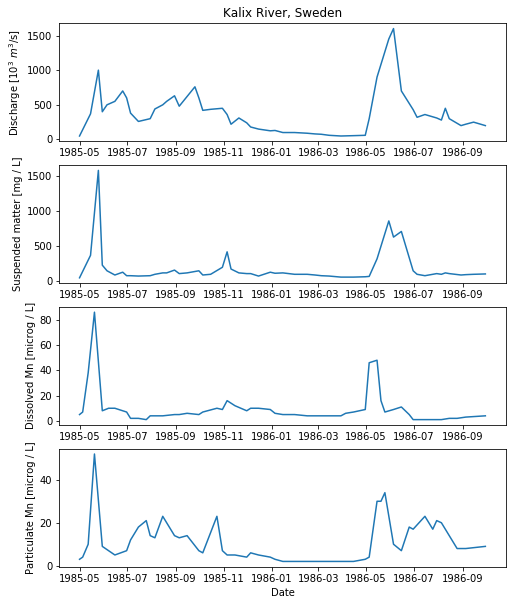

In [18]:
fig = plt.figure(figsize=(8,10))
ax1 = plt.subplot2grid((4, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((4, 1), (1, 0)) # dissolved mn
ax3 = plt.subplot2grid((4, 1), (2, 0)) # particulate mn
ax4 = plt.subplot2grid((4, 1), (3, 0)) # particulate mn

ax1.plot(Q_date2,Q2)
ax1.set_ylabel(r'Discharge [$10^3$ $m^3$/s]')
ax1.set_title('Kalix River, Sweden')

ax2.plot(Q_date2, TSS2)
ax2.set_ylabel('Suspended matter [mg / L]')

ax3.plot(Mn_date2, dMn2)
ax3.set_ylabel('Dissolved Mn [microg / L]')

ax4.plot(Mn_date2, pMn2)
ax4.set_xlabel('Date')
ax4.set_ylabel('Particulate Mn [microg / L]')

In [19]:
import seaborn as sns
sns.set_context('poster')
plt.rcParams['font.family'] = 'arial'

In [20]:
sns.set_palette("hls", 4)
sns.set_style("white")
sns.set_style("ticks")

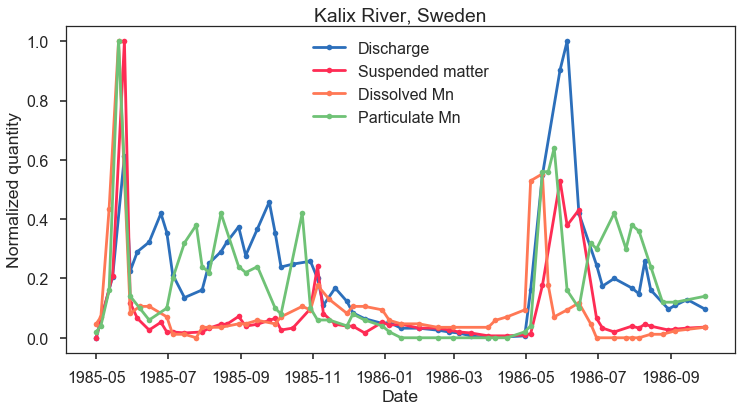

In [22]:
fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot2grid((1, 1), (0, 0)) # discharge

ax1.plot(Q_date2,normalize(Q2), '.-', label='Discharge', color=sns.xkcd_rgb['medium blue'])
ax1.plot(Q_date2,normalize(TSS2), '.-', label='Suspended matter', color=sns.xkcd_rgb['reddish pink'])
ax1.plot(Mn_date2,normalize(dMn2), '.-', label='Dissolved Mn', color=sns.xkcd_rgb['melon'])
ax1.plot(Mn_date2,normalize(pMn2), '.-', label='Particulate Mn', color=sns.xkcd_rgb['soft green'])

ax1.set_ylabel('Normalized quantity')
ax1.set_xlabel('Date')
ax1.set_title('Kalix River, Sweden')
ax1.legend()
ax1.patch.set_facecolor('white')
fig.patch.set_facecolor('none')
fig.savefig('trans_kalix.png',dpi=300, facecolor=fig.get_facecolor(), bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(a,b, 
             marker='.', markersize = 12,
             color = sns.xkcd_rgb['chartreuse'],
             markeredgewidth=1.0,
             markeredgecolor = 'k')

Dissolved Mn seems to follow suspended matter closely, implying any differences between them would be due to changes in the chemistry. The particulate Mn seems to follow the discharge more closely and deviates from the suspended matter, suggesting a physical reason?

# AGRO dataset: Arctic Rivers

<img src="files/watershedmap.jpg">

http://www.arcticgreatrivers.org/images/watershedmap.jpg

In [23]:
# Load data:
def read_AGRO(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    data = csv.reader(ifile)
    
    station = []
    date = []
    Mn = []
    TSS = []
   
    i = 0
    for row in data:
        i += 1
        if i < 2:
            i == 1
        else:
            station.append(str(row[0]))
            date.append(str(row[1]))
            Mn.append(float(row[2]))
            TSS.append(float(row[5]))
    return station, date, Mn, TSS

f1 = '/ocean/brogalla/GEOTRACES/data/rivers/AGRO_river_tracers.csv'

stat, dates, Mn, TSS = read_AGRO(f1)

In [24]:
# Load data:
def read_AGROQ(filename):
    ifile = open(filename,'rt', encoding='UTF8')
    data = csv.reader(ifile)
    
    date = []
    yukon = []
    mackenzie = []
    lena = []
    ob = []
    yenisey = []
    kolyma = []

    i = 0
    for row in data:
        i += 1
        if i <= 3:
            i == 2
        else:
            date.append(str(row[0]))
            yukon.append(float(row[1].replace(',','')))
            mackenzie.append(float(row[2].replace(',','')))
            lena.append(float(row[3].replace(',','')))
            ob.append(float(row[4].replace(',','')))
#            yenisey.append(float(row[5].replace(',','')))
            kolyma.append(float(row[6].replace(',','')))
    return date, yukon, mackenzie, lena, ob, yenisey, kolyma

f1 = '/ocean/brogalla/GEOTRACES/data/rivers/AGRO_river_discharge.csv'

date_Q, yukon, mackenzie, lena, ob, yenisey, kolyma = read_AGROQ(f1)

In [25]:
def convert_date(date):
    date_obj = []
    j = 0
    for i in date:
        j+=1
        conv = datetime.datetime.strptime(i, '%Y-%m-%d')
        date_obj.append(conv)
        
    return date_obj

In [26]:
dates_Q = convert_date(date_Q[::-1])
yukon = yukon[::-1]
mackenzie = mackenzie[::-1]
lena = lena[::-1]
ob = ob[::-1]
yenisey = yenisey[::-1]
kolyma = kolyma[::-1]

In [27]:
def convert_date_AGRO(date):
    date_obj = []
    j = 0
    for i in date:
        j+=1
        conv = datetime.datetime.strptime(i, '%d-%b-%y')
        date_obj.append(conv)
        
    return date_obj

In [28]:
dates_kolyma = dates[0:8]
dates_kolyma = convert_date_AGRO(dates_kolyma)
Mn_kolyma = Mn[0:8]
TSS_kolyma = TSS[0:8]

dates_lena = dates[8:23]
dates_lena = convert_date_AGRO(dates_lena)
Mn_lena = Mn[8:23]
TSS_lena = Mn[8:23]

dates_mack = dates[23:37]
dates_mack = convert_date_AGRO(dates_mack)
Mn_mack = Mn[23:37]
TSS_mack = TSS[23:37]

dates_ob = dates[37:52]
dates_ob = convert_date_AGRO(dates_ob)
Mn_ob = Mn[37:52]
TSS_ob = TSS[37:52]

dates_yenisey = dates[52:65]
dates_yenisey = convert_date_AGRO(dates_yenisey)
Mn_yenisey = Mn[52:65]
TSS_yenisey = TSS[52:65]

dates_yukon = dates[65:80]
dates_yukon = convert_date_AGRO(dates_yukon)
Mn_yukon = Mn[65:80]
TSS_yukon = TSS[65:80]

In [29]:
def toTimestamp(d):
    return calendar.timegm(d.timetuple())

Q_dates = np.array([dates_Q[0] + datetime.timedelta(weeks=i) for i in range(52*3)])

In [30]:
def interp_date(date_obj, value):
    arr1 = np.array([toTimestamp(date_obj[i]) for i in range(0,len(date_obj))]) 
    arr2 = value
    
    interp_dates = np.array([dates_Q[0] + datetime.timedelta(weeks=i) for i in range(52*3)])
    results = []
    
    for i in range(0,len(interp_dates)):
        result = np.interp(toTimestamp(interp_dates[i]),arr1,arr2)
        results.append(result)
        
    return results

In [31]:
Q_yukon = interp_date(dates_Q, yukon)
Q_mackenzie = interp_date(dates_Q, mackenzie)
Q_lena = interp_date(dates_Q, lena)
Q_ob = interp_date(dates_Q, ob)
Q_kolyma = interp_date(dates_Q, kolyma)

In [32]:
ice_yukon = [datetime.datetime.strptime('2004-05-04', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-04-29','%Y-%m-%d')]
ice_mack = [datetime.datetime.strptime('2004-05-01', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-04-26','%Y-%m-%d')]
ice_lena = [datetime.datetime.strptime('2004-05-15', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-05-15','%Y-%m-%d')]
ice_ob = [datetime.datetime.strptime('2004-04-30', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-04-30','%Y-%m-%d')]
ice_kolyma = [datetime.datetime.strptime('2004-05-21', '%Y-%m-%d'),\
            datetime.datetime.strptime('2005-05-21','%Y-%m-%d')]

/home/brogalla/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
/home/brogalla/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:343: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


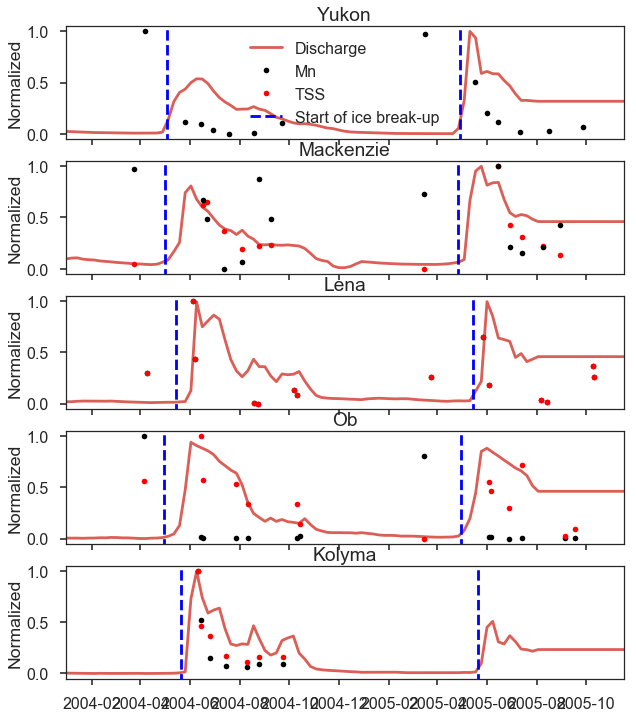

In [75]:
fig = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((5, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((5, 1), (1, 0))
ax3 = plt.subplot2grid((5, 1), (2, 0))
ax4 = plt.subplot2grid((5, 1), (3, 0))
ax5 = plt.subplot2grid((5, 1), (4, 0))

ax1.plot(Q_dates, normalize(Q_yukon), label='Discharge')
#ax1.plot(Q_dates, normalize(QMn_yukon), label='Mn')
ax1.plot(dates_yukon, normalize(Mn_yukon), '.k', label = 'Mn')
ax1.plot(dates_yukon, normalize(TSS_yukon), '.r', label = 'TSS')
ax1.plot([ice_yukon[0],ice_yukon[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax1.plot([ice_yukon[1],ice_yukon[1]],[-0.1, 1.1],'--b')
ax1.set_ylabel('Normalized')
ax1.set_title('Yukon')
ax1.set_xlim(Q_dates[52], Q_dates[150])
ax1.set_xticklabels([])
ax1.set_ylim(-0.05,1.05)
ax1.legend()

ax2.plot(Q_dates, normalize(Q_mackenzie), label='Discharge')
ax2.plot(dates_mack, normalize(TSS_mack), '.r')
#ax2.plot(Q_dates, normalize(QMn_mackenzie), label='Mn')
ax2.plot([ice_mack[0],ice_mack[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax2.plot([ice_mack[1],ice_mack[1]],[-0.1, 1.1],'--b')
ax2.plot(dates_mack, normalize(Mn_mack),'.k')
ax2.set_ylabel('Normalized')
ax2.set_title('Mackenzie')
ax2.set_xlim(Q_dates[52], Q_dates[150])
ax2.set_ylim(-0.05,1.05)
ax2.set_xticklabels([])

ax3.plot(Q_dates, normalize(Q_lena), label='Discharge')
# ax3.plot(Q_dates, normalize(QMn_lena), label='Mn')
ax3.plot(dates_lena, normalize(Mn_lena),'.k')
ax3.plot(dates_lena, normalize(TSS_lena), '.r')
ax3.plot([ice_lena[0],ice_lena[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax3.plot([ice_lena[1],ice_lena[1]],[-0.1, 1.1],'--b')
ax3.set_ylabel('Normalized')
ax3.set_title('Lena')
ax3.set_xlim(Q_dates[52], Q_dates[150])
ax3.set_ylim(-0.05,1.05)
ax3.set_xticklabels([])

ax4.plot(Q_dates, normalize(Q_ob), label='Discharge')
# ax4.plot(Q_dates, normalize(QMn_ob), label='Mn')
ax4.plot(dates_ob, normalize(Mn_ob),'.k')
ax4.plot(dates_ob, normalize(TSS_ob), '.r')
ax4.plot([ice_ob[0],ice_ob[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax4.plot([ice_ob[1],ice_ob[1]],[-0.1, 1.1],'--b')
ax4.set_ylabel('Normalized')
ax4.set_title('Ob')
ax4.set_xlim(Q_dates[52], Q_dates[150])
ax4.set_ylim(-0.05,1.05)
ax4.set_xticklabels([])

ax5.plot(Q_dates, normalize(Q_kolyma), label='Discharge')
# ax5.plot(Q_dates, normalize(QMn_kolyma), label='Mn')
ax5.plot(dates_kolyma, normalize(Mn_kolyma),'.k')
ax5.plot(dates_kolyma, normalize(TSS_kolyma), '.r')
ax5.plot([ice_kolyma[0],ice_kolyma[0]],[-0.1, 1.1],'--b', label= 'Start of ice break-up')
ax5.plot([ice_kolyma[1],ice_kolyma[1]],[-0.1, 1.1],'--b')
ax5.set_ylabel('Normalized')
ax5.set_title('Kolyma')
ax5.set_xlim(Q_dates[52], Q_dates[150])
ax5.set_ylim(-0.05,1.05)

fig.savefig('AGRO_rivers_SPM.png',bbox_inches='tight')

In [33]:
print(Q_dates[52])
print(Q_dates[150])

2003-12-31 00:00:00
2005-11-16 00:00:00


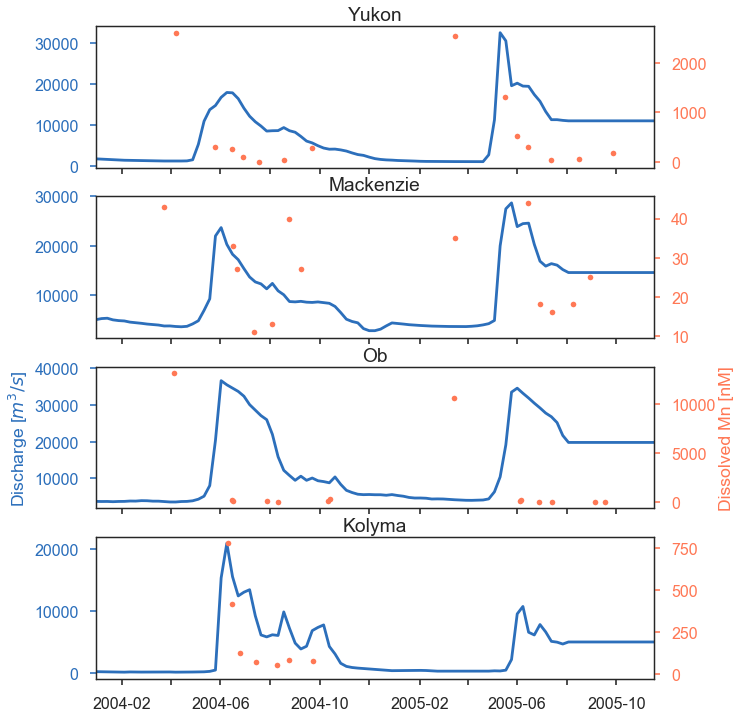

In [34]:
fig = plt.figure(figsize=(10,12))
ax1 = plt.subplot2grid((4, 1), (0, 0)) # discharge
ax2 = plt.subplot2grid((4, 1), (1, 0))
ax4 = plt.subplot2grid((4, 1), (2, 0))
ax5 = plt.subplot2grid((4, 1), (3, 0))

ax1.plot(Q_dates, Q_yukon, c=sns.xkcd_rgb['medium blue'])
ax1b =ax1.twinx()
ax1.tick_params('y', colors=sns.xkcd_rgb['medium blue'])
ax1b.plot(dates_yukon, Mn_yukon, '.', c=sns.xkcd_rgb['melon'])
ax1b.tick_params('y', colors=sns.xkcd_rgb['melon'])
ax1.set_title('Yukon')
ax1.set_xlim(Q_dates[52], Q_dates[150])
ax1.set_xticklabels([])

ax2.plot(Q_dates, Q_mackenzie, c=sns.xkcd_rgb['medium blue'])
ax2.tick_params('y', colors=sns.xkcd_rgb['medium blue'])
ax2b =ax2.twinx()
ax2b.plot(dates_mack, Mn_mack,'.', c=sns.xkcd_rgb['melon'])
ax2b.tick_params('y', colors=sns.xkcd_rgb['melon'])
ax2.set_title('Mackenzie')
ax2.set_xlim(Q_dates[52], Q_dates[150])
ax2.set_xticklabels([])

ax4.plot(Q_dates, Q_ob, c=sns.xkcd_rgb['medium blue'])
ax4.tick_params('y', colors=sns.xkcd_rgb['medium blue'])
ax4b =ax4.twinx()
ax4b.plot(dates_ob, Mn_ob,'.', c=sns.xkcd_rgb['melon'])
ax4b.tick_params('y', colors=sns.xkcd_rgb['melon'])
ax4.set_ylabel(r'Discharge [$m^3/s$]', color=sns.xkcd_rgb['medium blue'])
ax4b.set_ylabel('Dissolved Mn [nM]', color=sns.xkcd_rgb['melon'])
ax4.set_title('Ob')
ax4.set_xlim(Q_dates[52], Q_dates[150])
ax4.set_xticklabels([])

ax5.plot(Q_dates, Q_kolyma, c=sns.xkcd_rgb['medium blue'])
ax5.tick_params('y', colors=sns.xkcd_rgb['medium blue'])
ax5b =ax5.twinx()
ax5b.plot(dates_kolyma, Mn_kolyma,'.', c=sns.xkcd_rgb['melon'])
ax5b.tick_params('y', colors=sns.xkcd_rgb['melon'])
ax5.set_title('Kolyma')
ax5.set_xlim(Q_dates[52], Q_dates[150])

for label in ax5.get_xticklabels()[1::2]:
    label.set_visible(False)

fig.patch.set_facecolor('none')
ax1.patch.set_facecolor('white')
ax2.patch.set_facecolor('white')
ax4.patch.set_facecolor('white')
ax5.patch.set_facecolor('white')

fig.savefig('trans_AGRO_rivers_SPM.png', facecolor=fig.get_facecolor(), dpi=300, bbox_inches='tight')